## Import statements

In [ ]:
from sklearn import svm
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '16'


## Code to plot surface of $f(x): \mathbb{R}^2 \rightarrow \mathbb{R}$ over the domain $[x_{1min}, x_{1max}]\times[x_{2min}, x_{2max}]$

In [ ]:
def plot_function_2d_input(f, x1_min, x1_max, x2_min, x2_max, elev=None, angle=None, color='g', ax=None,
                           xlabel='x1', ylabel='x2', zlabel='z'):
    x1_values = np.linspace(x1_min, x1_max, 51)
    x2_values = np.linspace(x2_min, x2_max, 51)

    x1_grid, x2_grid = np.meshgrid(x1_values,x2_values)

    M,N = x1_grid.shape
    z_grid = np.zeros((M,N))

    for i in range(M):
        for j in range(N):
            x1 = x1_grid[i,j]
            x2 = x2_grid[i,j]
            z_grid[i,j] = f(np.array([x1, x2]))

    if ax is None:
        ax = plt.axes(projection='3d')

    ax.plot_surface(x1_grid, x2_grid, z_grid, color=color, alpha=0.3)
    ax.plot_wireframe(x1_grid, x2_grid, z_grid, color=color, rcount=30, ccount=30, linewidth=1)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)

    ax.set_xlim(x1_min, x1_max)
    ax.set_ylim(x2_min, x2_max)
    # ax.set_zlim([-20, 20])

    ax.view_init(elev, angle)

## Data for SVM problem

In [ ]:
X = np.array([[0, 0],
              [-1, -4],
              [-1.5, -1.5],
              [-4, -1],
              [1, 1],
              [3, 3]])
y = np.array([-1, -1, -1, -1, 1, 1])

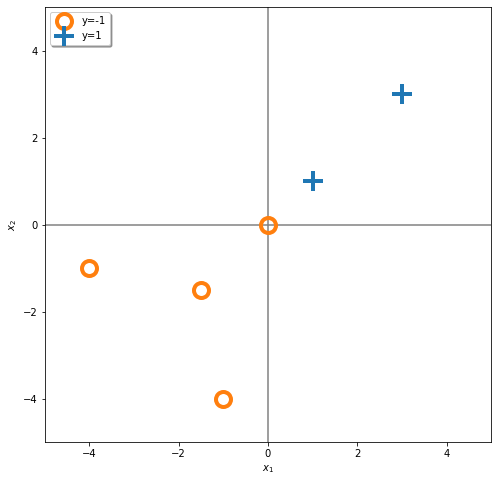

In [ ]:
plt.figure(figsize=(8,8))
plt.gca().axhline(y=0, color='gray')
plt.gca().axvline(x=0, color='gray')
plt.plot(X[y==-1, 0], X[y==-1, 1], 'o', markersize=15, markeredgewidth=4, color='tab:orange', fillstyle='none', label="y=-1")
plt.plot(X[y==1, 0], X[y==1, 1], '+', markersize=20, markeredgewidth=4, color="tab:blue", label="y=1")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend(loc='upper left', shadow=True)

## Train SVM models and then plot surface

In [ ]:
# Example SVM code from scikit-learn
# https://scikit-learn.org/stable/modules/svm.html
# Make sure to read the documentation on the input parameters
# and attributes
# Hint: you don't want to use the default value for C

# Train
from sklearn.svm import SVC
import math

# 1. Linear kernel
#clf = SVC(C=math.inf, kernel='linear')
# 2. Quadratic kernel
#clf = SVC(C=math.inf, kernel='poly', degree=2)
# 3. RBF kernel with gamma=3
#clf = SVC(C=math.inf, kernel='rbf', gamma=3)
# 4. RBF kernel with gamma=0.5
#clf = SVC(C=math.inf, kernel='rbf', gamma=0.5)
# # 5. RBF kernel with gamma=0.1
clf = SVC(C=math.inf, kernel='rbf', gamma=0.1)


clf.fit(X, y)

# Extract support vectors and dual coefficients
# print(clf.coef_)
# print(clf.intercept_)
alpha = clf.dual_coef_
print("alpha", alpha)
sv = clf.support_vectors_
print("support vectors", sv)
I = clf.intercept_
print("bias", I)

# Plot z = w^T\phi(x) + b (using the dual formulation)
# Note the missing sign function in the above expression
# Plot

alpha [[-5.30580521 -0.12259468 -0.12241792  5.5508178 ]]
support vectors [[ 0.  0.]
 [-1. -4.]
 [-4. -1.]
 [ 1.  1.]]
bias [-0.1935348]


## Example of plotting a surface using our `plot_function_2d_input` function

1.8185948536513634
<function f at 0x7fc31d1db8c0>


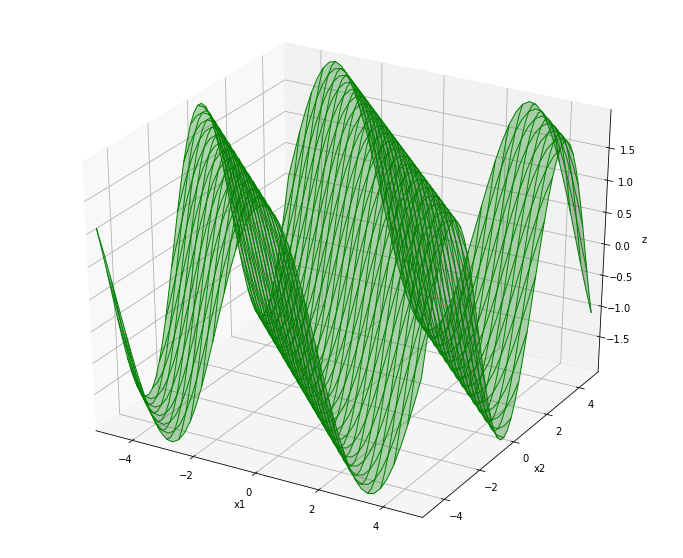

In [ ]:
# Example
def f(x):
    a = 2
    b = 1
    c = 1
    return a*np.sin(b*x[0] + c*x[1])

# Quick test
x = np.array([1, 1])
z = f(x)
print(z)

# Plot
plt.figure(figsize=(12,10))
plot_function_2d_input(f, -5, 5, -5, 5)
print(f)

1.0001
<function f at 0x7fc31cbf2cb0>


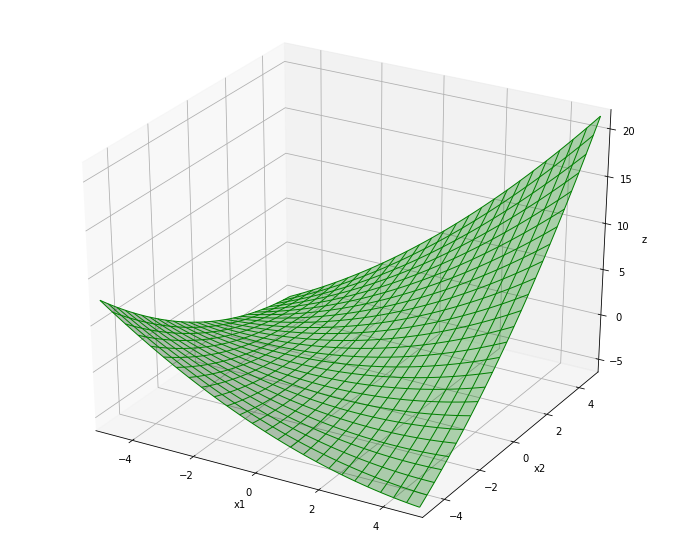

In [ ]:
# Quadratic kernel
def f(x):
    a = 0.1066
    b = 0.2040
    c = 0.1067
    d = 0.3446
    e = 0.3446
    f = 0
    g = -0.9996
    return (a*(x[0]**2))+(2*b*x[0]*x[1])+(c*(x[1]**2))+(2*d*x[0])+(2*e*x[1])+f+g

# Quick test
x = np.array([1, 1])
z = f(x)
print(z)

# Plot
plt.figure(figsize=(12,10))
plot_function_2d_input(f, -5, 5, -5, 5)
print(f)


In [ ]:
# rbf, gamma=3
def f(x):
    gamma = 3
    sum = 0
    alpha = [-0.67002265, -0.66671337, -0.66574917, -0.66575009,  1.33494745,  1.33328783]
    for i in range(len(alpha)):
        sum += alpha[i]*(math.exp(-gamma*(((x[0]-sv[i][0])**2) + ((x[1]-sv[i][1])**2))))
    return sum + I

# Quick test
x = np.array([1, 1])
z = f(x)
print(z)

# Plot
plt.figure(figsize=(12,10))
plot_function_2d_input(f, -5, 5, -5, 5)
print(f)


IndexError: ignored

In [ ]:
# gamma = 0.5
def f(x):
    gamma = 0.5
    sum = 0
    alpha = [-1.27279671, -0.6527158,  -0.49066213, -0.65321522,  1.77378325,  1.29560661]
    for i in range(len(alpha)):
        sum += alpha[i]*(math.exp(-gamma*(((x[0]-sv[i][0])**2) + ((x[1]-sv[i][1])**2))))
    return sum + I

# # Quick test
x = np.array([1, 1])
z = f(x)
print(z)

# Plot
plt.figure(figsize=(12,10))
plot_function_2d_input(f, -5, 5, -5, 5)
print(f)

In [ ]:
# gamma = 0.1
def f(x):
    gamma = 0.1
    sum = 0
    alpha = [-5.30580521, -0.12259468, -0.12241792,  5.5508178]
    for i in range(len(alpha)):
        sum += alpha[i]*(math.exp(-gamma*(((x[0]-sv[i][0])**2) + ((x[1]-sv[i][1])**2))))
    return sum + I

# # Quick test
x = np.array([1, 1])
z = f(x)
print(z)

# Plot
plt.figure(figsize=(12,10))
plot_function_2d_input(f, -5, 5, -5, 5)
print(f)